In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
import ppscore as pps

In [2]:
#reading dataset

df_train = pd.read_csv("HR Attrition dataset_train.csv")
df_test = pd.read_csv("HR Attrition dataset_test.csv")

In [3]:
#checking uploaded data
df_train.head()

Employee_ID Gender   Age  Education_Level Relationship_Status     Hometown  \
0   EID_23371      F  42.0                4             Married     Franklin   
1   EID_18000      M  24.0                3              Single  Springfield   
2    EID_3891      F  58.0                3             Married      Clinton   
3   EID_17492      F  26.0                3              Single      Lebanon   
4   EID_22534      F  31.0                1             Married  Springfield   

                        Unit Decision_skill_possess  Time_of_service  \
0                         IT             Conceptual              4.0   
1                  Logistics             Analytical              5.0   
2                    Quality             Conceptual             27.0   
3  Human Resource Management             Behavioral              4.0   
4                  Logistics             Conceptual              5.0   

   Time_since_promotion  growth_rate  Travel_Rate  Post_Level  Pay_Scale  \
0                     4           33            1           1        7.0   
1                     4           36            0           3        6.0   
2                     3           51            0           2        8.0   
3                     3           56            1           3        8.0   
4                     4           62            1           3        2.0   

  Compensation_and_Benefits  Work_Life_balance  Attrition_rate  
0                     type2                3.0          0.1841  
1                     type2                4.0          0.0670  
2                     type2                1.0          0.0851  
3                     type2                1.0          0.0668  
4                     type3                3.0          0.1827

In [4]:
df_test.tail()

Employee_ID Gender   Age  Education_Level Relationship_Status  \
2995   EID_22547      F  32.0                3              Single   
2996   EID_10066      F   NaN                2              Single   
2997    EID_7126      F  60.0                4              Single   
2998    EID_4929      F  51.0                1             Married   
2999   EID_24750      F  45.0                1              Single   

         Hometown       Unit Decision_skill_possess  Time_of_service  \
2995     Franklin      Sales              Directive              3.0   
2996     Franklin  Marketing             Conceptual             10.0   
2997      Lebanon  Logistics             Analytical             35.0   
2998  Springfield         IT             Behavioral             23.0   
2999     Franklin      Sales              Directive             12.0   

      Time_since_promotion  growth_rate  Travel_Rate  Post_Level  Pay_Scale  \
2995                     3           38            1           3        6.0   
2996                     2           57            1           4        9.0   
2997                     1           69            0           2        9.0   
2998                     1           30            0           2        6.0   
2999                     4           70            1           2        8.0   

     Compensation_and_Benefits  Work_Life_balance  
2995                     type2                2.0  
2996                     type2                1.0  
2997                     type3                3.0  
2998                     type3                1.0  
2999                     type4                4.0

In [5]:
# sns.pairplot(df_train,hue="Attrition_rate",size=3)


In [6]:
pp.ProfileReport(df_train)

In [7]:
pp.ProfileReport(df_test)

# Explorative data analysis

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

# checking null values

In [9]:
df_train.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
Attrition_rate                 0
dtype: int64

In [10]:
df_train.shape
df_test.shape

(3000, 16)

# checking test data null values

In [11]:
df_test.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          161
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               52
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
dtype: int64

## Here there are 8% in train and 7% in test are null values. 
## so, we can drop those null values

In [12]:
NANColumns=[]
i=-1
for a in df_train.isnull().sum():
    i+=1
    if a!=0:
        print(df_train.columns[i],a)
        NANColumns.append(df_train.columns[i])

Age 412
Time_of_service 144
Pay_Scale 9
Work_Life_balance 11


In [13]:
NANColumns=[]
i=-1
for a in df_test.isnull().sum():
    i+=1
    if a!=0:
        print(df_test.columns[i],a)
        NANColumns.append(df_test.columns[i])

Age 161
Time_of_service 52
Pay_Scale 3
Work_Life_balance 5


In [14]:
#count of null values
np.sum(df_train.isnull().any(axis=1))

567

In [15]:
df_train.dtypes

Employee_ID                   object
Gender                        object
Age                          float64
Education_Level                int64
Relationship_Status           object
Hometown                      object
Unit                          object
Decision_skill_possess        object
Time_of_service              float64
Time_since_promotion           int64
growth_rate                    int64
Travel_Rate                    int64
Post_Level                     int64
Pay_Scale                    float64
Compensation_and_Benefits     object
Work_Life_balance            float64
Attrition_rate               float64
dtype: object

# removing unwanted columns like emp id and missing values

In [16]:
df_new_train  = df_train.drop(['Employee_ID'],axis = 1)
df_new_train 

Gender   Age  Education_Level Relationship_Status     Hometown  \
0         F  42.0                4             Married     Franklin   
1         M  24.0                3              Single  Springfield   
2         F  58.0                3             Married      Clinton   
3         F  26.0                3              Single      Lebanon   
4         F  31.0                1             Married  Springfield   
...     ...   ...              ...                 ...          ...   
6995      F  23.0                5             Married     Franklin   
6996      F  44.0                1             Married      Lebanon   
6997      F  49.0                3              Single  Springfield   
6998      F  47.0                3             Married   Washington   
6999      F  58.0                3             Married     Franklin   

                           Unit Decision_skill_possess  Time_of_service  \
0                            IT             Conceptual              4.0   
1                     Logistics             Analytical              5.0   
2                       Quality             Conceptual             27.0   
3     Human Resource Management             Behavioral              4.0   
4                     Logistics             Conceptual              5.0   
...                         ...                    ...              ...   
6995                 Operarions             Behavioral              4.0   
6996                        R&D             Analytical             16.0   
6997                         IT              Directive             10.0   
6998                      Sales             Behavioral             24.0   
6999                         IT              Directive             22.0   

      Time_since_promotion  growth_rate  Travel_Rate  Post_Level  Pay_Scale  \
0                        4           33            1           1        7.0   
1                        4           36            0           3        6.0   
2                        3           51            0           2        8.0   
3                        3           56            1           3        8.0   
4                        4           62            1           3        2.0   
...                    ...          ...          ...         ...        ...   
6995                     1           20            1           2        6.0   
6996                     2           59            0           2        4.0   
6997                     1           59            1           2        3.0   
6998                     1           21            1           5        8.0   
6999                     2           74            0           4        5.0   

     Compensation_and_Benefits  Work_Life_balance  Attrition_rate  
0                        type2                3.0          0.1841  
1                        type2                4.0          0.0670  
2                        type2                1.0          0.0851  
3                        type2                1.0          0.0668  
4                        type3                3.0          0.1827  
...                        ...                ...             ...  
6995                     type3                3.0          0.7839  
6996                     type3                3.0          0.1055  
6997                     type2                4.0          0.7847  
6998                     type0                2.0          0.4162  
6999                     type2                3.0          0.0910  

[7000 rows x 16 columns]

In [17]:
df_new_train1  = df_new_train .dropna()

In [18]:
df_test_new = df_test.dropna()
df_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2781 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                2781 non-null   object 
 1   Gender                     2781 non-null   object 
 2   Age                        2781 non-null   float64
 3   Education_Level            2781 non-null   int64  
 4   Relationship_Status        2781 non-null   object 
 5   Hometown                   2781 non-null   object 
 6   Unit                       2781 non-null   object 
 7   Decision_skill_possess     2781 non-null   object 
 8   Time_of_service            2781 non-null   float64
 9   Time_since_promotion       2781 non-null   int64  
 10  growth_rate                2781 non-null   int64  
 11  Travel_Rate                2781 non-null   int64  
 12  Post_Level                 2781 non-null   int64  
 13  Pay_Scale                  2781 non-null   float

In [19]:
df_test_new  = df_test.drop(['Employee_ID'],axis = 1)
df_test_new.head()

Gender   Age  Education_Level Relationship_Status     Hometown       Unit  \
0      F  32.0                5              Single  Springfield        R&D   
1      M  65.0                2              Single      Lebanon         IT   
2      M  52.0                3             Married  Springfield      Sales   
3      M  50.0                5              Single   Washington  Marketing   
4      F  44.0                3             Married     Franklin        R&D   

  Decision_skill_possess  Time_of_service  Time_since_promotion  growth_rate  \
0             Conceptual              7.0                     4           30   
1              Directive             41.0                     2           72   
2              Directive             21.0                     3           25   
3             Analytical             11.0                     4           28   
4             Conceptual             12.0                     4           47   

   Travel_Rate  Post_Level  Pay_Scale Compensation_and_Benefits  \
0            1           5        4.0                     type2   
1            1           1        1.0                     type2   
2            0           1        8.0                     type3   
3            1           1        2.0                     type0   
4            1           3        2.0                     type2   

   Work_Life_balance  
0                1.0  
1                1.0  
2                1.0  
3                4.0  
4                4.0

# Graphical analysis

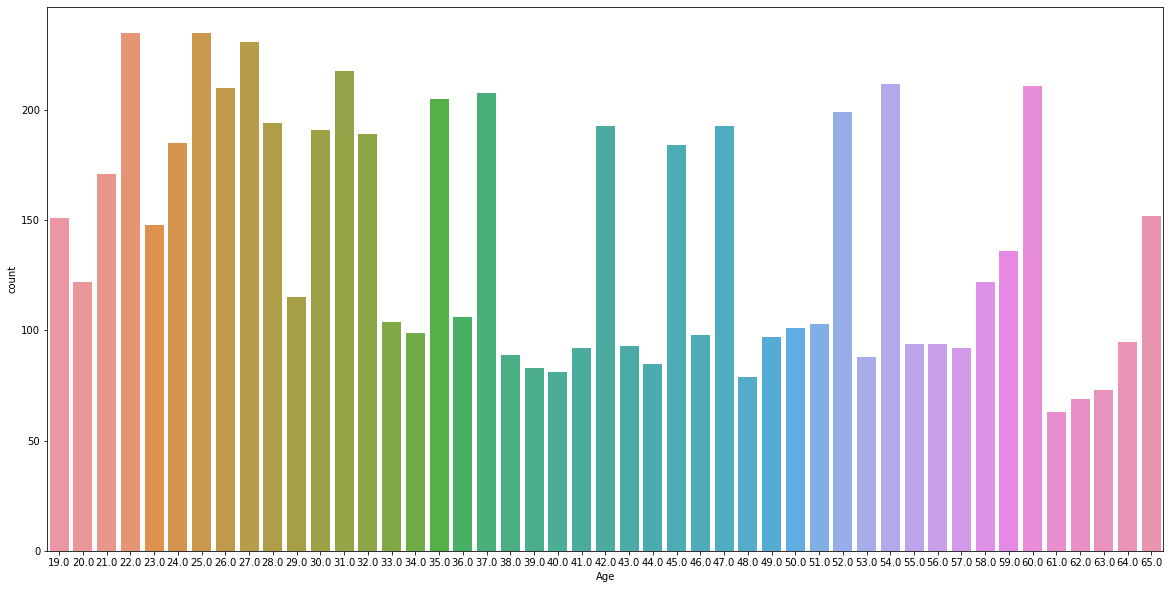

In [20]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="Age", data= df_train)

In [21]:
df_train

Employee_ID Gender   Age  Education_Level Relationship_Status  \
0      EID_23371      F  42.0                4             Married   
1      EID_18000      M  24.0                3              Single   
2       EID_3891      F  58.0                3             Married   
3      EID_17492      F  26.0                3              Single   
4      EID_22534      F  31.0                1             Married   
...          ...    ...   ...              ...                 ...   
6995   EID_16328      F  23.0                5             Married   
6996    EID_8387      F  44.0                1             Married   
6997    EID_8077      F  49.0                3              Single   
6998   EID_19597      F  47.0                3             Married   
6999    EID_1640      F  58.0                3             Married   

         Hometown                       Unit Decision_skill_possess  \
0        Franklin                         IT             Conceptual   
1     Springfield                  Logistics             Analytical   
2         Clinton                    Quality             Conceptual   
3         Lebanon  Human Resource Management             Behavioral   
4     Springfield                  Logistics             Conceptual   
...           ...                        ...                    ...   
6995     Franklin                 Operarions             Behavioral   
6996      Lebanon                        R&D             Analytical   
6997  Springfield                         IT              Directive   
6998   Washington                      Sales             Behavioral   
6999     Franklin                         IT              Directive   

      Time_of_service  Time_since_promotion  growth_rate  Travel_Rate  \
0                 4.0                     4           33            1   
1                 5.0                     4           36            0   
2                27.0                     3           51            0   
3                 4.0                     3           56            1   
4                 5.0                     4           62            1   
...               ...                   ...          ...          ...   
6995              4.0                     1           20            1   
6996             16.0                     2           59            0   
6997             10.0                     1           59            1   
6998             24.0                     1           21            1   
6999             22.0                     2           74            0   

      Post_Level  Pay_Scale Compensation_and_Benefits  Work_Life_balance  \
0              1        7.0                     type2                3.0   
1              3        6.0                     type2                4.0   
2              2        8.0                     type2                1.0   
3              3        8.0                     type2                1.0   
4              3        2.0                     type3                3.0   
...          ...        ...                       ...                ...   
6995           2        6.0                     type3                3.0   
6996           2        4.0                     type3                3.0   
6997           2        3.0                     type2                4.0   
6998           5        8.0                     type0                2.0   
6999           4        5.0                     type2                3.0   

      Attrition_rate  
0             0.1841  
1             0.0670  
2             0.0851  
3             0.0668  
4             0.1827  
...              ...  
6995          0.7839  
6996          0.1055  
6997          0.7847  
6998          0.4162  
6999          0.0910  

[7000 rows x 17 columns]

## Plot corrrealtion matrix

In [22]:
df_new_train.sort_values(by=['Attrition_rate'], ascending=[False])

Gender   Age  Education_Level Relationship_Status     Hometown  \
3422      F  47.0                4              Single      Lebanon   
3034      F  47.0                1              Single   Washington   
2724      F  51.0                5              Single      Lebanon   
5133      F  45.0                4             Married     Franklin   
6282      M  25.0                3             Married  Springfield   
...     ...   ...              ...                 ...          ...   
5419      F  47.0                3             Married      Lebanon   
5173      F  27.0                4             Married  Springfield   
221       F  22.0                3             Married     Franklin   
3426      M  56.0                3              Single     Franklin   
3024      M  31.0                3             Married      Lebanon   

                        Unit Decision_skill_possess  Time_of_service  \
3422               Logistics             Behavioral             15.0   
3034                   Sales              Directive              8.0   
2724              Production             Behavioral             21.0   
5133              Purchasing             Analytical             17.0   
6282  Accounting and Finance             Conceptual              6.0   
...                      ...                    ...              ...   
5419              Operarions              Directive             20.0   
5173                   Sales             Analytical              4.0   
221   Accounting and Finance              Directive              3.0   
3426               Logistics              Directive             25.0   
3024                      IT             Behavioral              8.0   

      Time_since_promotion  growth_rate  Travel_Rate  Post_Level  Pay_Scale  \
3422                     1           65            1           3        6.0   
3034                     4           54            1           3        4.0   
2724                     4           34            1           1        6.0   
5133                     2           66            1           3        6.0   
6282                     3           57            1           2        5.0   
...                    ...          ...          ...         ...        ...   
5419                     2           29            2           5        6.0   
5173                     1           43            1           3        2.0   
221                      3           46            1           4        4.0   
3426                     3           71            1           4        8.0   
3024                     3           30            1           4        7.0   

     Compensation_and_Benefits  Work_Life_balance  Attrition_rate  
3422                     type2                2.0          0.9959  
3034                     type3                1.0          0.9957  
2724                     type3                3.0          0.9930  
5133                     type3                5.0          0.9910  
6282                     type4                4.0          0.9897  
...                        ...                ...             ...  
5419                     type2                3.0          0.0001  
5173                     type3                2.0          0.0000  
221                      type3                3.0          0.0000  
3426                     type2                2.0          0.0000  
3024                     type3                2.0          0.0000  

[7000 rows x 16 columns]

In [23]:
# consider attrition rate more than 70 % as left from company
df_new_train[df_new_train['Attrition_rate'] > 0.7]

Gender   Age  Education_Level Relationship_Status     Hometown  \
5         M  54.0                3             Married      Lebanon   
25        F   NaN                2             Married   Washington   
63        F  37.0                4              Single  Springfield   
108       F  31.0                2              Single      Clinton   
130       M  28.0                3             Married      Lebanon   
...     ...   ...              ...                 ...          ...   
6909      F  27.0                5              Single     Franklin   
6932      M  27.0                3             Married     Franklin   
6966      F  65.0                1              Single   Washington   
6995      F  23.0                5             Married     Franklin   
6997      F  49.0                3              Single  Springfield   

            Unit Decision_skill_possess  Time_of_service  \
5     Purchasing             Conceptual             19.0   
25     Marketing              Directive             15.0   
63     Logistics             Conceptual             12.0   
108   Operarions             Conceptual              3.0   
130        Sales              Directive              4.0   
...          ...                    ...              ...   
6909          IT             Conceptual              3.0   
6932    Security             Analytical              5.0   
6966   Marketing             Behavioral             34.0   
6995  Operarions             Behavioral              4.0   
6997          IT              Directive             10.0   

      Time_since_promotion  growth_rate  Travel_Rate  Post_Level  Pay_Scale  \
5                        1           21            2           5        9.0   
25                       1           58            1           3        3.0   
63                       4           59            1           2        4.0   
108                      2           73            1           4        4.0   
130                      1           48            0           3        1.0   
...                    ...          ...          ...         ...        ...   
6909                     2           23            0           3       10.0   
6932                     1           63            1           5        7.0   
6966                     4           40            1           3        4.0   
6995                     1           20            1           2        6.0   
6997                     1           59            1           2        3.0   

     Compensation_and_Benefits  Work_Life_balance  Attrition_rate  
5                        type2                1.0          0.7613  
25                       type2                1.0          0.8727  
63                       type4                3.0          0.9262  
108                      type3                3.0          0.7367  
130                      type0                1.0          0.7559  
...                        ...                ...             ...  
6909                     type2                3.0          0.9615  
6932                     type2                3.0          0.9735  
6966                     type2                1.0          0.8574  
6995                     type3                3.0          0.7839  
6997                     type2                4.0          0.7847  

[283 rows x 16 columns]

In [24]:
df_new_train['Attrition'] = 0
df_new_train.loc[df_new_train['Attrition_rate'] > 0.7, 'Attrition'] = 1

In [25]:
df_new_train['Attrition'].value_counts()

0    6717
1     283
Name: Attrition, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='count'>

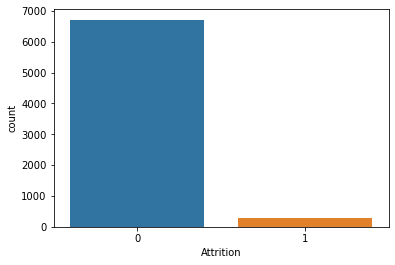

In [26]:
sns.countplot(df_new_train['Attrition'])

#### Expected Model prediction accuracy

In [27]:
((6717 - 283) / 6717 ) * 100

95.78680958761352

### Plot number of employees attrition by 'age'

In [28]:
df_new_train = df_new_train.dropna(subset = ['Age'])

In [29]:
df_new_train['Age'] = df_new_train['Age'].astype(int)

<ipython-input-29-3102f2b6bf02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_train['Age'] = df_new_train['Age'].astype(int)


<ipython-input-30-e16e9f3b7f85>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.int(label.get_text()) % 2 == 0:


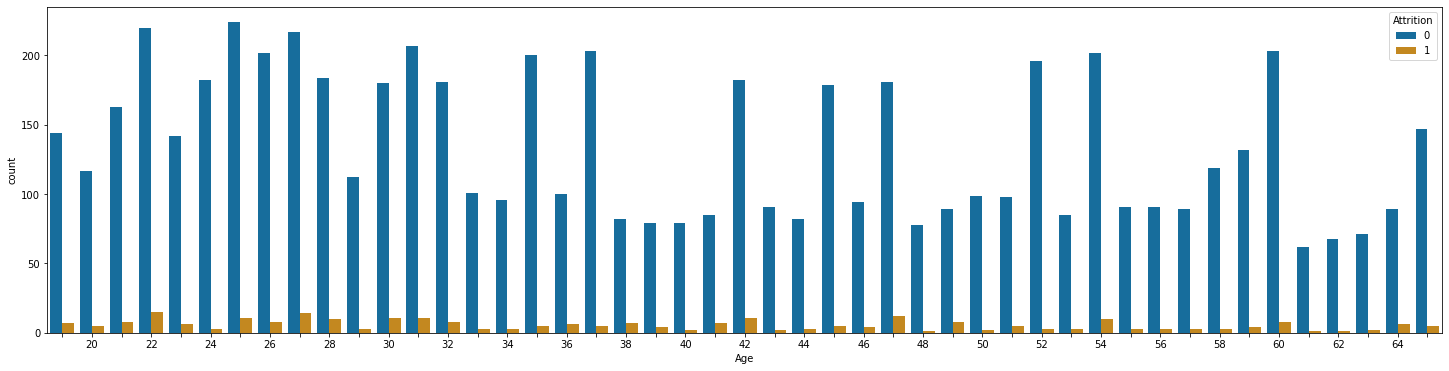

In [30]:
plt.subplots(figsize=(25,6))
plot_ = sns.countplot(x='Age', hue='Attrition', data=df_new_train, palette='colorblind')

for label in plot_.get_xticklabels():
    if np.int(label.get_text()) % 2 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)

### >> Certain age groups like '24-32' or '41-43' has more employee attrition rate

In [31]:
df_new_train.corr()

Age  Education_Level  Time_of_service  \
Age                   1.000000        -0.005770         0.918853   
Education_Level      -0.005770         1.000000        -0.008681   
Time_of_service       0.918853        -0.008681         1.000000   
Time_since_promotion  0.145760        -0.008143         0.133492   
growth_rate           0.001270        -0.000708        -0.001106   
Travel_Rate           0.012266        -0.019370         0.005739   
Post_Level            0.002440         0.013164         0.001888   
Pay_Scale             0.012966         0.007944         0.018579   
Work_Life_balance     0.003073        -0.017946        -0.004673   
Attrition_rate       -0.015498        -0.007097        -0.019306   
Attrition            -0.021449        -0.000766        -0.025275   

                      Time_since_promotion  growth_rate  Travel_Rate  \
Age                               0.145760     0.001270     0.012266   
Education_Level                  -0.008143    -0.000708    -0.019370   
Time_of_service                   0.133492    -0.001106     0.005739   
Time_since_promotion              1.000000     0.012344    -0.015549   
growth_rate                       0.012344     1.000000     0.006309   
Travel_Rate                      -0.015549     0.006309     1.000000   
Post_Level                       -0.009916    -0.007010     0.024168   
Pay_Scale                        -0.006643    -0.005548    -0.016837   
Work_Life_balance                -0.012892    -0.015181     0.001958   
Attrition_rate                    0.015935     0.009589    -0.013879   
Attrition                         0.000317     0.022140     0.001637   

                      Post_Level  Pay_Scale  Work_Life_balance  \
Age                     0.002440   0.012966           0.003073   
Education_Level         0.013164   0.007944          -0.017946   
Time_of_service         0.001888   0.018579          -0.004673   
Time_since_promotion   -0.009916  -0.006643          -0.012892   
growth_rate            -0.007010  -0.005548          -0.015181   
Travel_Rate             0.024168  -0.016837           0.001958   
Post_Level              1.000000   0.019145          -0.013892   
Pay_Scale               0.019145   1.000000          -0.026213   
Work_Life_balance      -0.013892  -0.026213           1.000000   
Attrition_rate          0.018031  -0.012146           0.023884   
Attrition               0.007390  -0.013023           0.018194   

                      Attrition_rate  Attrition  
Age                        -0.015498  -0.021449  
Education_Level            -0.007097  -0.000766  
Time_of_service            -0.019306  -0.025275  
Time_since_promotion        0.015935   0.000317  
growth_rate                 0.009589   0.022140  
Travel_Rate                -0.013879   0.001637  
Post_Level                  0.018031   0.007390  
Pay_Scale                  -0.012146  -0.013023  
Work_Life_balance           0.023884   0.018194  
Attrition_rate              1.000000   0.701985  
Attrition                   0.701985   1.000000

<AxesSubplot:>

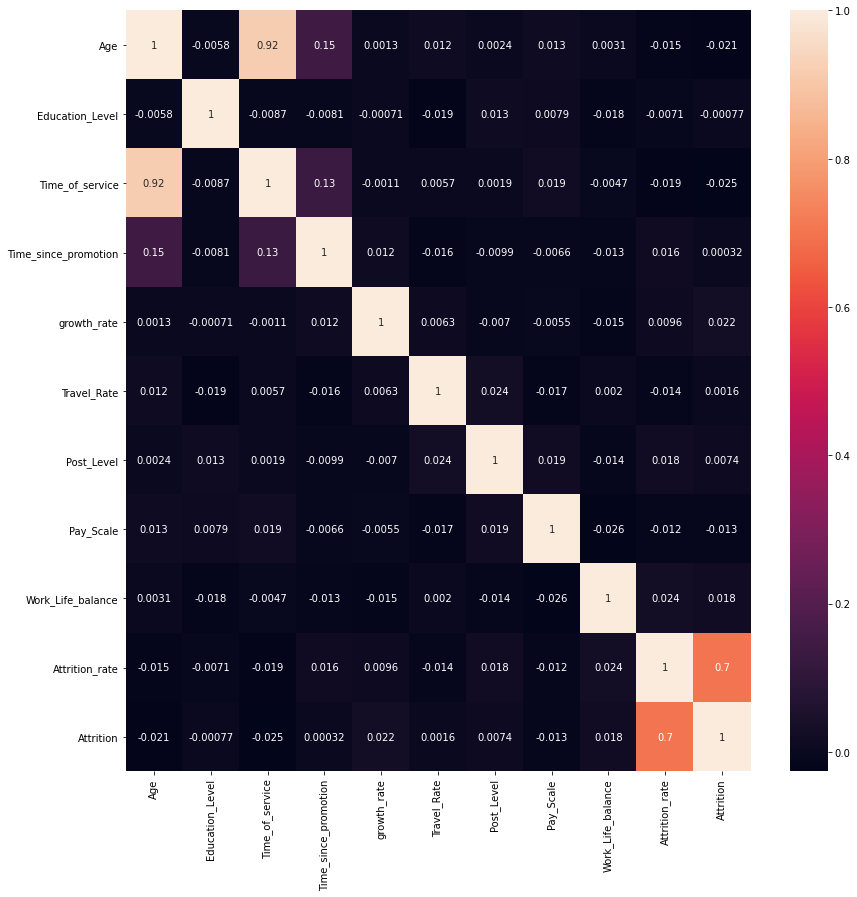

In [32]:
plt.figure(figsize=(14,14))
sns.heatmap(df_new_train.corr(), annot=True)

<AxesSubplot:>

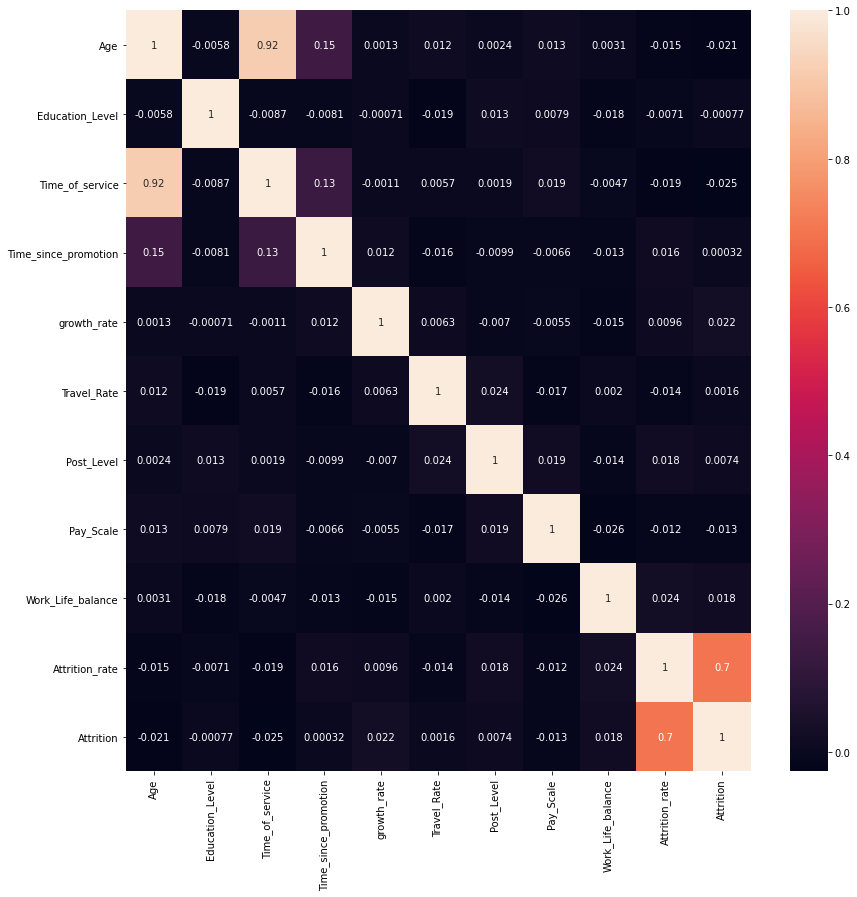

In [33]:
# Correlation in percentage
plt.figure(figsize=(14,14))
sns.heatmap(df_new_train.corr(), annot=True)

## Predictive Power score

In [34]:
df_new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6588 entries, 0 to 6999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     6588 non-null   object 
 1   Age                        6588 non-null   int32  
 2   Education_Level            6588 non-null   int64  
 3   Relationship_Status        6588 non-null   object 
 4   Hometown                   6588 non-null   object 
 5   Unit                       6588 non-null   object 
 6   Decision_skill_possess     6588 non-null   object 
 7   Time_of_service            6451 non-null   float64
 8   Time_since_promotion       6588 non-null   int64  
 9   growth_rate                6588 non-null   int64  
 10  Travel_Rate                6588 non-null   int64  
 11  Post_Level                 6588 non-null   int64  
 12  Pay_Scale                  6579 non-null   float64
 13  Compensation_and_Benefits  6588 non-null   objec

In [35]:
df_new_train.columns

Index(['Gender', 'Age', 'Education_Level', 'Relationship_Status', 'Hometown',
       'Unit', 'Decision_skill_possess', 'Time_of_service',
       'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level',
       'Pay_Scale', 'Compensation_and_Benefits', 'Work_Life_balance',
       'Attrition_rate', 'Attrition'],
      dtype='object')

In [36]:
str_cols = ['Gender', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess', 
            'Compensation_and_Benefits'
           ]

In [37]:
df_new_train['Age'] = df_new_train['Age'].astype('float')

<ipython-input-37-a9dd9196b940>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_train['Age'] = df_new_train['Age'].astype('float')


In [38]:
df_new_train[df_new_train['Age'].isna()]['Age']

Series([], Name: Age, dtype: float64)

In [39]:
pps.score(df_new_train, 'Gender', 'Attrition')

{'x': 'Gender',
 'y': 'Attrition',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 0.0422,
 'model_score': 0.08077120750243857,
 'model': DecisionTreeRegressor()}

In [40]:
# plt.figure(figsize=(14,14))
# sns.heatmap(pps.matrix(df_new_train.drop(str_cols, axis=1)), annot=True)

In [41]:

## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df_new_train.columns if df_new_train[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df_new_train[feature].isnull().mean(), 4),  ' % missing values')

Time_of_service 0.0208  % missing values
Pay_Scale 0.0014  % missing values
Work_Life_balance 0.0017  % missing values


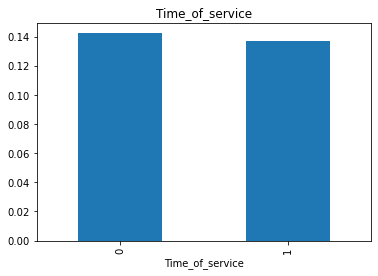

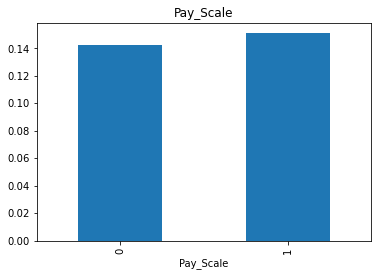

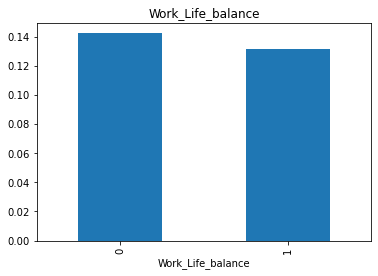

In [42]:
for feature in features_with_na:
    data = df_new_train.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean  Attrition rate where the information is missing or present
    data.groupby(feature)['Attrition_rate'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [43]:
# list of numerical variables
numerical_features = [feature for feature in df_new_train.columns if df_new_train[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df_new_train[numerical_features].head()

Number of numerical variables:  11


Age  Education_Level  Time_of_service  Time_since_promotion  growth_rate  \
0  42.0                4              4.0                     4           33   
1  24.0                3              5.0                     4           36   
2  58.0                3             27.0                     3           51   
3  26.0                3              4.0                     3           56   
4  31.0                1              5.0                     4           62   

   Travel_Rate  Post_Level  Pay_Scale  Work_Life_balance  Attrition_rate  \
0            1           1        7.0                3.0          0.1841   
1            0           3        6.0                4.0          0.0670   
2            0           2        8.0                1.0          0.0851   
3            1           3        8.0                1.0          0.0668   
4            1           3        2.0                3.0          0.1827   

   Attrition  
0          0  
1          0  
2          0  
3          0  
4          0

In [44]:
df = df_train.fillna(df_train.median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        7000 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            7000 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  7000 non-null   float

In [45]:
df1= df_test.fillna(df_test.median())
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                3000 non-null   object 
 1   Gender                     3000 non-null   object 
 2   Age                        3000 non-null   float64
 3   Education_Level            3000 non-null   int64  
 4   Relationship_Status        3000 non-null   object 
 5   Hometown                   3000 non-null   object 
 6   Unit                       3000 non-null   object 
 7   Decision_skill_possess     3000 non-null   object 
 8   Time_of_service            3000 non-null   float64
 9   Time_since_promotion       3000 non-null   int64  
 10  growth_rate                3000 non-null   int64  
 11  Travel_Rate                3000 non-null   int64  
 12  Post_Level                 3000 non-null   int64  
 13  Pay_Scale                  3000 non-null   float

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                3000 non-null   object 
 1   Gender                     3000 non-null   object 
 2   Age                        3000 non-null   float64
 3   Education_Level            3000 non-null   int64  
 4   Relationship_Status        3000 non-null   object 
 5   Hometown                   3000 non-null   object 
 6   Unit                       3000 non-null   object 
 7   Decision_skill_possess     3000 non-null   object 
 8   Time_of_service            3000 non-null   float64
 9   Time_since_promotion       3000 non-null   int64  
 10  growth_rate                3000 non-null   int64  
 11  Travel_Rate                3000 non-null   int64  
 12  Post_Level                 3000 non-null   int64  
 13  Pay_Scale                  3000 non-null   float

In [47]:
X = df

In [48]:
y= df['Attrition_rate']

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4900, 17) (2100, 17) (4900,) (2100,)


In [50]:
df = df.drop(['Employee_ID'], axis  = 1)
df1 = df1.drop(["Employee_ID"],axis  = 1)

In [51]:
df_obj = df.select_dtypes(include=['object'])
df_int = df.select_dtypes(exclude = ['object'])


In [52]:
df_obj.head()

Gender Relationship_Status     Hometown                       Unit  \
0      F             Married     Franklin                         IT   
1      M              Single  Springfield                  Logistics   
2      F             Married      Clinton                    Quality   
3      F              Single      Lebanon  Human Resource Management   
4      F             Married  Springfield                  Logistics   

  Decision_skill_possess Compensation_and_Benefits  
0             Conceptual                     type2  
1             Analytical                     type2  
2             Conceptual                     type2  
3             Behavioral                     type2  
4             Conceptual                     type3

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_obj = df_obj.apply(le.fit_transform)

In [54]:
tot = pd.concat([df_int,df_obj],axis=1)

In [55]:
tot.head()

Age  Education_Level  Time_of_service  Time_since_promotion  growth_rate  \
0  42.0                4              4.0                     4           33   
1  24.0                3              5.0                     4           36   
2  58.0                3             27.0                     3           51   
3  26.0                3              4.0                     3           56   
4  31.0                1              5.0                     4           62   

   Travel_Rate  Post_Level  Pay_Scale  Work_Life_balance  Attrition_rate  \
0            1           1        7.0                3.0          0.1841   
1            0           3        6.0                4.0          0.0670   
2            0           2        8.0                1.0          0.0851   
3            1           3        8.0                1.0          0.0668   
4            1           3        2.0                3.0          0.1827   

   Gender  Relationship_Status  Hometown  Unit  Decision_skill_possess  \
0       0                    0         1     2                       2   
1       1                    1         3     3                       0   
2       0                    0         0     8                       2   
3       0                    1         2     1                       1   
4       0                    0         3     3                       2   

   Compensation_and_Benefits  
0                          2  
1                          2  
2                          2  
3                          2  
4                          3

In [56]:
X = tot.drop(['Attrition_rate'],axis=1)

In [57]:
y = tot['Attrition_rate']

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4900, 15) (2100, 15) (4900,) (2100,)


### Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [60]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)


coefficient of determination: 0.004501965640722139


In [61]:
model.score(X_test,y_test)

0.006692329077687464

In [62]:
print('intercept:', model.intercept_)

intercept: 0.1752314627875231


In [63]:
print('slope:', model.coef_)

slope: [-1.82614245e-05 -1.32781979e-03 -3.35905348e-04  2.76858630e-03
  1.68493201e-04 -3.94871234e-03  2.76346324e-03 -1.27951156e-03
  3.45918964e-03  1.11509757e-02  3.55579918e-03  1.15491649e-03
  1.36430895e-03  2.98312766e-03 -6.57355559e-03]


In [64]:
new_model = LinearRegression().fit(X, y.values.reshape((-1, 1)))

In [65]:
new_model.score(X_train, y_train)

0.003365140407124878

In [66]:
from sklearn.metrics import confusion_matrix

In [76]:
# cm = confusion_matrix(y_test, new_model.predict(X_test))

In [68]:
new_model.score(X_test, y_test)

0.006692329077687464

### RF Classification

In [74]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 42)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [73]:
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier()
# rf.fit(X_train, y_train)